<a href="https://colab.research.google.com/github/phong-utm/man1153-pma/blob/master/PMA_Phong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining (MANB1153) - Post Module Assessment

**Nguyen Nam Phong (MAN191065)**

# Question 1 - Problem Statement and Project Scope

**Problem Statement:**

Acute inflammations of the urinary system such as *bladder inflammation* and *nephritises* are rather commom and they can cause severe pains to the patient. In many cases, these inflammations can be diagnosed based on the symptoms without other confirmatory tests. Such kind of *presumptive diagnosis* can be facilitated by a machine learning model so as to increase the productivity and efficiency of health care services.

**Project Scope:**

The main objective of this project is using machine learning to develop **two** models that can diagnose ***bladder inflammation*** and ***acute nephritis*** based on their symptoms. To do so, we will use the [*Acute Inflammations dataset* from the UCI repository](http://archive.ics.uci.edu/ml/datasets/Acute+Inflammations). This dataset contains information of 120 patients with the following six symptoms:

1. Temperature of patient 
2. Occurrence of nausea (Y/N)
3. Lumbar pain (Y/N)
4. Urine pushing i.e., continuous need for urination (Y/N)
5. Micturition pains (Y/N)
6. Burning of urethra, itch, swelling of urethra outlet (Y/N)

The following diagram depicts the main activities in this project:

<br/>

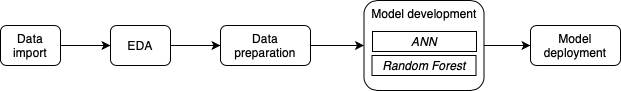

1. **Data import**: imports the input dataset and converts temperature values to numbers.

2. **EDA**: performs exploratory data analysis to better understand the symptoms of acute inflammations.

3. **Data preparation**: transforms categorical values into numbers, standardizes temparature values, and splits data for training and testing.

4. **Model development**: uses *ANN* and *Random Forest* to build, train, and evaluate a number of classification models to predict *bladder inflammation* and *nephritis*.

5. **Model deployment**: develops a web application that makes use of selected models from step 4.

# Question 2 - Data Mining Model

The machine learning models that we are going to develop in this project are for ***classification*** purposes. The following diagram shows how such a model works:

<br />

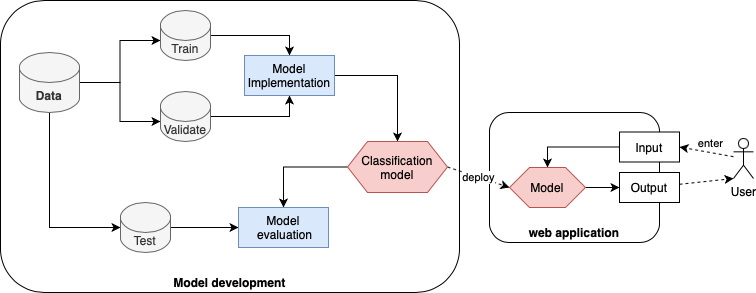

Going from left to right in the diagram above:

* First, we will split the input dataset into two parts: a larger part for implementing the model, and a smaller part for testing the model.

* During the process of model training, we will split the data further into training data and cross-validation data.

* After training the model, we will evaluate the model based on the *classification accuracy* metric.

* If the model is good enough, we will deploy it to a web application for users to make predictions.


# Question 3 - Exploratory Data Analysis (EDA)

In this section, we are going to import the input dataset and perfom some exploratory data analysis.

### 3.0. Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# convert the first column (temparature) e.g. from text "15,9" to number value (15.9)
converters = {
  0: lambda x: float(x.replace(',', '.')) 
}

df = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data', encoding='utf-16', header=None, converters=converters)
df.columns = ['temperature', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pain', 'urethra_burning', 'bladder_inflammation', 'nephritis']
df

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pain,urethra_burning,bladder_inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### 3.1. Is there any correlation between body temperature and acute inflammations?

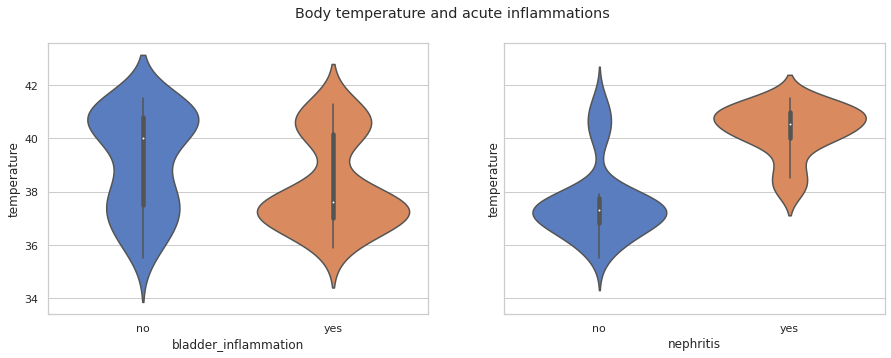

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")

# create 2 violin plots: one for bladder inflammation, the other for nephritis
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.violinplot(data=df, x="bladder_inflammation", y="temperature", ax=axes[0])
sns.violinplot(data=df, x="nephritis", y="temperature", ax=axes[1])

# show the plot
fig.suptitle('Body temperature and acute inflammations')
plt.show()

The violin plots above show that most patients with bladder inflammation have rather normal temperature around 37 degrees Celcius, whereas almost all patients with acute nephritis have higher temperature with a majority at around 41 Celcius.

### 3.2. Which symptoms are most common among the patients?


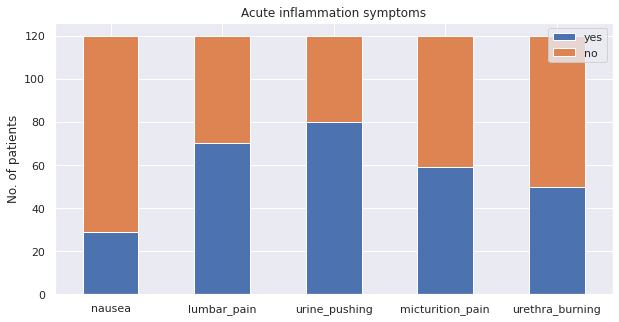

In [ ]:
symptoms = ['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pain', 'urethra_burning']

# count patients: who have the symptom and who don't?
symptom_counts = [df[s].value_counts().sort_index(ascending=False) for s in symptoms]
df_symptoms = pd.DataFrame(symptom_counts)

# plot a stacked bar chart
sns.set()
df_symptoms.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Acute inflammation symptoms')
plt.ylabel('No. of patients')
plt.xticks(rotation=0)
plt.show()

The stacked bar chart above shows that urine pushing is the most common symptom followed by lumbar pains. It means that people with acute inflammations of the urinary system are likely to feel a constant need to urinate, and to suffer from pains in the abdominal segment of the torso.

### 3.3. Which symptoms are most indicative of bladder inflammation?

First, let's create a function that helps us plot a pie chart for each of the symptoms:

In [ ]:
def plot_symptom_pie_charts(inflammation):
  # get data for patients with the inflammation only
  df_bladder = df[df[inflammation] == 'yes'][symptoms]

  # there will be a pie chart for each symptom
  fig, axes = plt.subplots(1, len(symptoms), figsize=(len(symptoms) * 5, 5))
  for idx, ax in enumerate(axes):
    symptom = symptoms[idx]

    # count patients: who have the symptom and who don't?
    patient_counts = df_bladder[symptom].value_counts().sort_index(ascending=False)

    # plot the pie chart
    ax.pie(patient_counts, labels=patient_counts.index, autopct='%1.2f%%')
    ax.set_title(symptom)

  fig.suptitle(inflammation + ' symptoms')
  plt.show()  

Now, let's use our function to plot the charts:

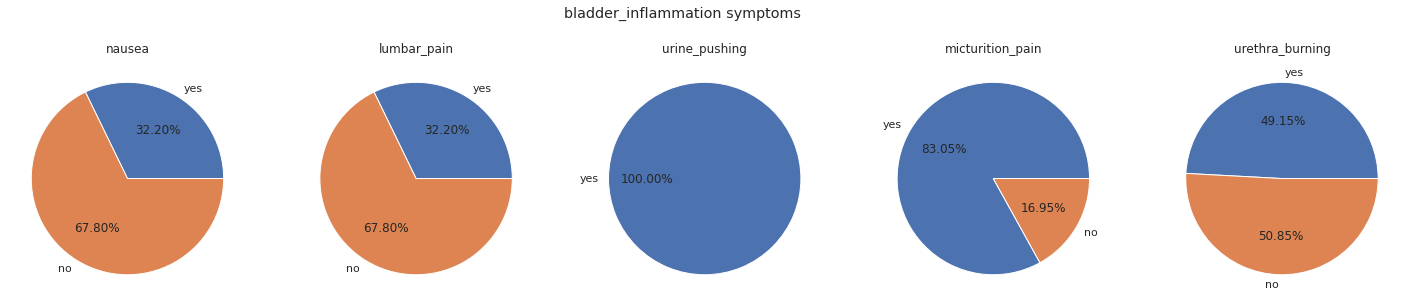

In [ ]:
plot_symptom_pie_charts('bladder_inflammation')

From the charts, we can see that urine pushing and micturition pains (i.e., pains when urinating) are the most indicative symptoms of bladder inflammation with 100% of the patients suffer from urine pushing and 83% suffer from micturition pains.

### 3.4. Which symptoms are most indicative of acute nephritis?

We will use the same function above for nephritis cases:

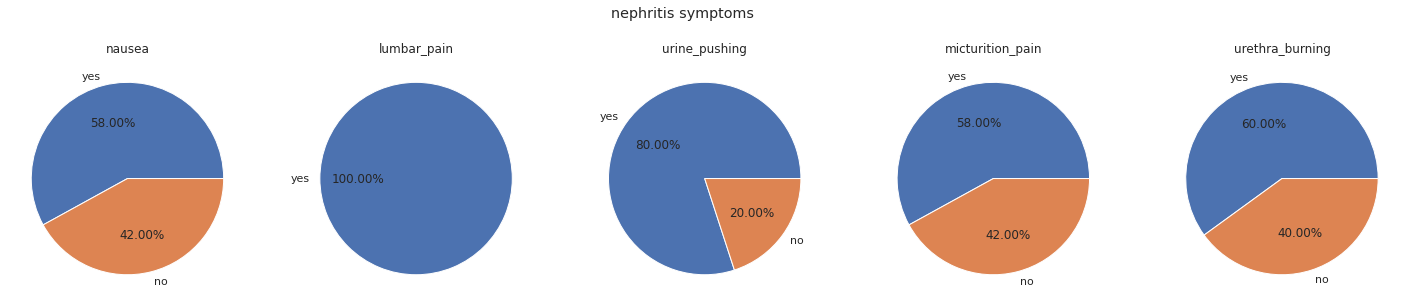

In [ ]:
plot_symptom_pie_charts('nephritis')

From the charts above, we can see that lumbar pain and urine pushing are the most indicative symptoms of acute nephritis with 100% of the patients suffer from lumbar pains and 80% suffer from urine pushing.

### 3.5. Do patients usually have bladder inflammation and nephritis at the same time?

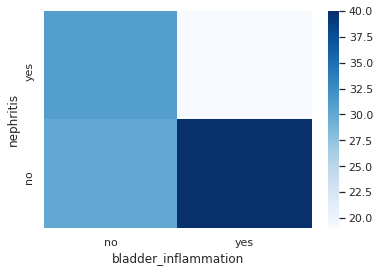

In [ ]:
# count patients by the 2 diseases
df_disease_matrix = df.groupby('bladder_inflammation')['nephritis'].value_counts()
df_disease_matrix = df_disease_matrix.unstack(level=0).sort_index(level=0, ascending=False)

# plot a heatmap
sns.heatmap(df_disease_matrix, cmap='Blues')
plt.show()

The heatmap above suggests that there are more people with bladder inflammation than with acute nephritis, and only a few of them having both diseases.

# Question 4 - Machine Learning

## 4.0. Data preparation

Firstly, we need to convert non-numerical features into numerical values:

In [ ]:
df_transformed = pd.DataFrame()

non_numerical_cols = ['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pain', 'urethra_burning', 'bladder_inflammation', 'nephritis']

# transform the columns, one after another
for c in non_numerical_cols:
  df_transformed[c] = df[c].apply(lambda x: 1 if x == 'yes' else 0)

Secondly, we will use ScikitLearn's **StandardScaler** to standardize temperature values in order to improve the performance of machine learning:

In [ ]:
from sklearn.preprocessing import StandardScaler

# get temperatures
temperatures = df['temperature'].to_numpy().reshape(-1, 1)

# standardize the values
scaler = StandardScaler()
transformed_temperatures = scaler.fit_transform(temperatures)

# add transformed temperatures to the same data frame with the categorical features
df_transformed['temperature'] = pd.Series(transformed_temperatures.reshape(-1))

Thirdly, we will prepare the features and labels for machine learning. Note that we have **two** sets of labels here: one indicates if the patients have *bladder inflammation*, the other indicates if they have *acute nephritis*.

In [ ]:
X = df_transformed.drop(labels=['bladder_inflammation', 'nephritis'], axis=1)
y_bladder = df_transformed['bladder_inflammation']
y_nephritis = df_transformed['nephritis']

Finally, we will split the dataset and leave aside 20% of the records for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_bladder, X_test_bladder, y_train_bladder, y_test_bladder = train_test_split(X, y_bladder, test_size=0.2)
X_train_nephritis, X_test_nephritis, y_train_nephritis, y_test_nephritis = train_test_split(X, y_nephritis, test_size=0.2)

## 4.1. Artificial neural networks

In this section, we will use Keras to build two ANNs: one to predict if the patient has **bladder inflammation**, the other to predict if the patient has **nephritis**. But before that, let's create several common functions that we will utilize in both cases.

### 4.1.0. Common functions

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

no_of_features = X.shape[1]

def build_ann():
  model = Sequential()
  model.add(Dense(20, activation='relu', input_shape=(no_of_features,)))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def train_ann(model, X_train, y_train):
  # convert our labels into 2 columns, one for "Yes", the other for "No"
  y_train_categorical = to_categorical(y_train)
  
  # stop training if loss doesn't improve in 5 consecutive epochs
  stopper = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

  # train the ANN
  train_history = model.fit(X_train, y_train_categorical, batch_size=4, epochs=50, validation_split=0.2, callbacks=[stopper])

  return train_history.history

def predict_with_ann(model, X_test):
  y_pred_categorical = model.predict(X_test)
  y_pred = np.argmax(y_pred_categorical, axis=1) # convert categorical values into a single value 
  return y_pred

def plot_ann_training_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

  ax1.plot(history['loss'])
  ax1.plot(history['val_loss'])
  ax1.set_title('model loss')
  ax1.set(xlabel='epoch')
  ax1.legend(['train', 'validation'])

  ax2.plot(history['accuracy'])
  ax2.plot(history['val_accuracy'])
  ax2.set_title('model accuracy')
  ax2.set(xlabel='epoch')
  ax2.legend(['train', 'validation'])

  plt.show()

### 4.1.1. ANN for bladder inflammation prediction

Let's build and train an ANN for bladder inflammation prediction using the common functions above:

In [ ]:
%%capture

ann_bladder = build_ann()
ann_train_results_bladder = train_ann(ann_bladder, X_train_bladder, y_train_bladder)

The following diagrams show how the model's accuracy and loss changed during the training process:

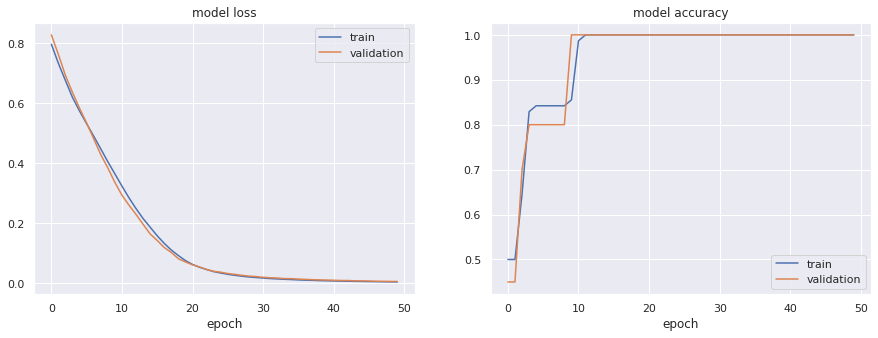

In [ ]:
plot_ann_training_history(ann_train_results_bladder)

The diagrams show that our ANN model achieved 100% accuracy after around 10 epochs while the model's loss continued to reduce after that and almost reached zero when we finished.

<br />

Let's evaluate the accuracy of the model using the test data that we set aside previously:

In [ ]:
y_pred_bladder = predict_with_ann(ann_bladder, X_test_bladder)
confusion_matrix(y_test_bladder, y_pred_bladder)

array([[12,  0],
       [ 0, 12]])

In [ ]:
accuracy_score(y_test_bladder, y_pred_bladder)

1.0

Both the confusion matrix and the accuracy score above show that our ANN model produced impeccable results with absolutely no errors.

### 4.1.2. ANN for acute nephritis prediction

Let's build and train an ANN for acute nephritis prediction using the common functions above:

In [ ]:
%%capture

ann_nephritis = build_ann()
ann_train_results_nephritis = train_ann(ann_nephritis, X_train_nephritis, y_train_nephritis)

The following diagrams show how the model's accuracy and loss changed during the training process:

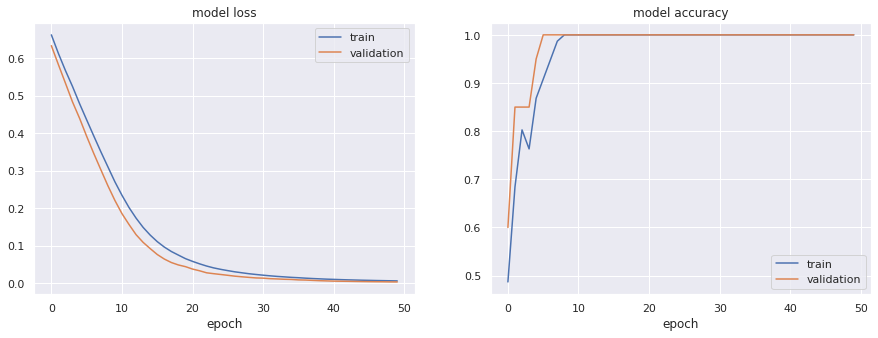

In [ ]:
plot_ann_training_history(ann_train_results_nephritis)

The diagrams show that our ANN model achieved 100% accuracy before the 10th epoch while the model's loss continued to reduce after that and almost reached zero when we finished.

Let's evaluate the accuracy of the model using the test data that we set aside previously:

In [ ]:
y_pred_nephritis = predict_with_ann(ann_nephritis, X_test_nephritis)
confusion_matrix(y_test_nephritis, y_pred_nephritis)

array([[13,  0],
       [ 0, 11]])

In [ ]:
accuracy_score(y_test_nephritis, y_pred_nephritis)

1.0

Both the confusion matrix and the accuracy score above show that our ANN model produced impeccable results with absolutely no errors.

## 4.2. Random Forest classifiers

In this section, we will use Random Forest algorithm for two classifier: one to predict if the patient has **bladder inflammation**, the other to predict if the patient has **nephritis**. But before that, let's create several common functions that we will utilize in both cases.

### 4.2.0. Common functions

The following function uses ScikitLearn's **RandomizedSearchCV** to help us create 5 different Random Forest classifiers, each of them uses a different combination of hyper parameters. This class also uses k-fold cross-validation (with k=3 as configured below) to split train/evaluation data during the model training process:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {
  # Number of trees in random forest
  'n_estimators': [1, 2, 5, 10, 20],
  # Number of features to consider at every split
  'max_features': ['auto', 'sqrt', 'log2'],
  # Maximum number of levels in tree
  'max_depth': [None, 10, 20, 30, 40, 50],
  # Minimum number of samples required to split a node
  'min_samples_split': [2, 5, 10],
  # Minimum number of samples required at each leaf node
  'min_samples_leaf': [1, 2, 4],
  # Method of selecting samples for training each tree
  'bootstrap': [True, False]
}

# creates and trains 5 different models (with k-fold CV) and finds the best model
def find_best_model(estimator, params, X_train, y_train, no_of_models=5, no_of_folds=3):
  search = RandomizedSearchCV(
    estimator = estimator, 
    param_distributions = params, 
    n_iter = no_of_models, 
    cv = no_of_folds, 
    random_state=0, 
    n_jobs = -1
  )
  search.fit(X_train, y_train)

  train_results = pd.DataFrame(search.cv_results_)
  best_model = search.best_estimator_

  return train_results, best_model

# plot test scores for the 5 models created 
def plot_test_scores(df_train_results):
  df_sorted = df_train_results.sort_values('mean_test_score', ignore_index=True)

  plt.plot(df_sorted['mean_test_score'])
  plt.xticks(np.arange(df_sorted.shape[0]))
  plt.xlabel('model')
  plt.ylabel('R-squared score')
  plt.show()

### 4.2.1. Random Forest classifier for bladder inflammation prediction

Let's use the common functions above to create 5 different Random Forest classifiers and choose the best one:

In [ ]:
rf_train_results_bladder, rf_best_model_bladder = find_best_model(RandomForestClassifier(), rf_params, X_train_bladder, y_train_bladder)

The following table summarizes the training results. Note that we have 5 models with different sets of hyper parameters, and for each of them we have 3 splits corresponding to 3-fold cross-validation. 

In [ ]:
rf_train_results_bladder[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'mean_fit_time', 'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,mean_fit_time,rank_test_score
0,"{'n_estimators': 20, 'min_samples_split': 5, '...",1.00000,1.00000,1.0,1.000000,0.049964,1
1,"{'n_estimators': 20, 'min_samples_split': 2, '...",1.00000,1.00000,1.0,1.000000,0.047408,1
2,"{'n_estimators': 2, 'min_samples_split': 2, 'm...",0.96875,1.00000,1.0,0.989583,0.006263,3
3,"{'n_estimators': 1, 'min_samples_split': 10, '...",1.00000,0.90625,1.0,0.968750,0.004486,5
4,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.96875,1.00000,1.0,0.989583,0.020487,3


The following chart shows the test scores achieved by the five models:

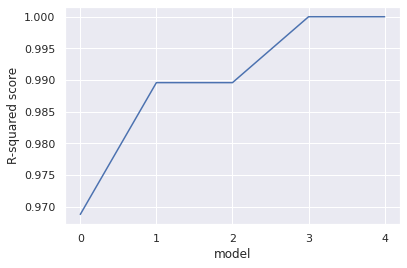

In [ ]:
plot_test_scores(rf_train_results_bladder)

The chart above shows that all of the five models achieved a very high test score with some of them achived the perfect score of 1.0.

<br/>

Let's evaluate the accuracy of the best model (out of the five above) using the test data that we set aside previously:

In [ ]:
y_pred_bladder_rf = rf_best_model_bladder.predict(X_test_bladder)
confusion_matrix(y_test_bladder, y_pred_bladder_rf)

array([[12,  0],
       [ 0, 12]])

In [ ]:
accuracy_score(y_test_bladder, y_pred_bladder_rf)

1.0

Both the confusion matrix and the accuracy score above show that our Random Forest classifier produced impeccable results with absolutely no errors.

### 4.2.2. Random Forest classifier for acute nephritis prediction

Let's use the common functions above to create 5 different Random Forest classifiers and choose the best one:

In [ ]:
rf_train_results_nephritis, rf_best_model_nephritis = find_best_model(RandomForestClassifier(), rf_params, X_train_nephritis, y_train_nephritis)

The following table summarizes the training results. Note that we have 5 models with different sets of hyper parameters, and for each of them we have 3 splits corresponding to 3-fold cross-validation.

In [ ]:
rf_train_results_nephritis[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'mean_fit_time', 'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,mean_fit_time,rank_test_score
0,"{'n_estimators': 20, 'min_samples_split': 5, '...",1.0,1.0000,1.00000,1.000000,0.053244,1
1,"{'n_estimators': 20, 'min_samples_split': 2, '...",1.0,1.0000,1.00000,1.000000,0.046513,1
2,"{'n_estimators': 2, 'min_samples_split': 2, 'm...",1.0,0.9375,1.00000,0.979167,0.006015,4
3,"{'n_estimators': 1, 'min_samples_split': 10, '...",1.0,1.0000,1.00000,1.000000,0.006414,1
4,"{'n_estimators': 10, 'min_samples_split': 10, ...",1.0,0.9375,0.84375,0.927083,0.021838,5


The following chart shows the test scores achieved by the five models:

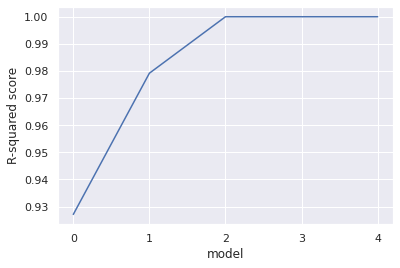

In [ ]:
plot_test_scores(rf_train_results_nephritis)

The chart above shows that all of the five models achieved a very high test score with some of them achived the perfect score of 1.0.

<br/>

Let's evaluate the accuracy of the best model (out of the five above) using the test data that we set aside previously:

In [ ]:
y_pred_nephritis_rf = rf_best_model_nephritis.predict(X_test_nephritis)
confusion_matrix(y_test_nephritis, y_pred_nephritis_rf)

array([[13,  0],
       [ 0, 11]])

In [ ]:
accuracy_score(y_test_nephritis, y_pred_nephritis_rf)

1.0

Both the confusion matrix and the accuracy score above show that our Random Forest classifier produced impeccable results with absolutely no errors.

## 4.3. Saving best models for deployment

Because both the ANN and the Random Forest models produced perfect prediction results, we can save either of them for deployment. We will go for the Random Forest models here because they are a bit easier to use.

In [ ]:
import joblib

joblib.dump(rf_best_model_bladder, 'bladder_model.joblib')

['bladder_model.joblib']

In [ ]:
joblib.dump(rf_best_model_nephritis, 'nephritis_model.joblib')

['nephritis_model.joblib']

Because we used **StandardScaler** to standardize temperature values before model training (see section *4.0. Data Preparation*), we should also save this object for later use in our web app:

In [ ]:
joblib.dump(scaler, 'temperature_scaler.joblib')

['temperature_scaler.joblib']